<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; padding: 20px; border-radius: 8px; border: 1px solid #ddd; line-height: 1.6; color: #333;">
  <h2 style="color: #4a90e2; text-align: center;">Análisis de Base de Datos de Quesos</h2>
  <p>El proyecto consiste en analizar una base de datos de <strong>quesos</strong> utilizando <strong>R</strong>, con el fin de extraer información relevante sobre sus características, como:</p>
  <ul style="margin-left: 20px;">
    <li><strong>Países de origen</strong></li>
    <li><strong>Regiones</strong></li>
    <li><strong>Texturas</strong></li>
    <li><strong>Familias</strong></li>
    <li><strong>Sabores</strong></li>
    <li><strong>Colores</strong></li>
    <li><strong>Tipos de leche</strong></li>
  </ul>
  <p>Se aplican diversas técnicas de <em>limpieza</em> y <em>visualización de datos</em>, incluyendo:</p>
  <ul style="margin-left: 20px;">
    <li>Gráficos de barras</li>
    <li>Gráficos circulares</li>
    <li>Nubes de palabras</li>
  </ul>
</div>


<div style="background-color:#F5F5F5; border:1px solid #DDD; padding:20px; border-radius:10px; font-family:Arial, sans-serif; color:#333;">

  <h2 style="color:#4A90E2; text-align:center; font-family:Arial, sans-serif;">Librerías Utilizadas en el Proyecto</h2>

  <p>
    Para llevar a cabo el análisis de la base de datos de quesos, se utilizaron las siguientes librerías en <strong>R</strong>:
  </p>

  <ul style="line-height:1.6;">
    <li><strong>dplyr</strong>: Proporciona funciones para <em>manipulación y transformación de datos</em>, como <code>filter()</code>, <code>mutate()</code> y <code>summarise()</code>.</li>
    <li><strong>ggplot2</strong>: Permite crear <em>gráficos personalizados</em> de alta calidad, incluyendo gráficos de barras y gráficos circulares.</li>
    <li><strong>RPostgreSQL</strong>: Facilita la <em>conexión y consulta de bases de datos PostgreSQL</em> desde R.</li>
    <li><strong>wordcloud</strong>: Se usa para crear <em>nubes de palabras</em> visualmente atractivas a partir de texto.</li>
    <li><strong>tm</strong> (Text Mining): Proporciona herramientas para la <em>limpieza y preprocesamiento de texto</em>, como la eliminación de puntuación y palabras vacías.</li>
    <li><strong>RColorBrewer</strong>: Ofrece una amplia gama de <em>paletas de colores</em> para mejorar la visualización de gráficos.</li>
    <li><strong>jsonlite</strong>: Permite <em>leer y escribir datos en formato JSON</em>, útil para manejar configuraciones como credenciales.</li>
  </ul>

  <p>
    Cada librería contribuye a diferentes partes del análisis, desde la manipulación de datos hasta la visualización y la conexión con la base de datos.
  </p>

</div>




In [1]:

library(dplyr)
library(ggplot2)
library(RPostgreSQL)
library(wordcloud)
library(tm)
library(RColorBrewer)
library(jsonlite)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: DBI

Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




<div style="background-color:#FAFAFA; border:1px solid #CCC; padding:20px; border-radius:10px; font-family:Arial, sans-serif; color:#333;">

  <h2 style="color:#4A90E2; text-align:center; font-family:Arial, sans-serif;">3. Extracción de Datos</h2>

  <p>
    La información sobre los quesos se obtiene desde una base de datos <strong>PostgreSQL</strong>. 
  </p>

  <p>
    El código utiliza <code>fromJSON("key.json")</code> para extraer las <em>credenciales de acceso</em> y luego se conecta a la base de datos utilizando <code>dbConnect()</code>.
  </p>

  <p>Los datos se obtienen con:</p>

  <pre style="background-color:#F0F0F0; border-left:4px solid #4A90E2; padding:10px; overflow-x:auto;">
<code style="color:#333;">library(RPostgreSQL)
library(jsonlite)

# Leer credenciales desde un archivo JSON
key <- fromJSON("key.json")

# Conectar a la base de datos PostgreSQL
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, 
                 dbname = key$dbname,
                 host = key$host,
                 port = key$port,
                 user = key$user,
                 password = key$password)

# Extraer los datos de la tabla 'cheeses'
df <- dbGetQuery(con, "SELECT * FROM cheeses")
</code></pre>

</div>


In [2]:
key <- fromJSON("key.json")

In [3]:

drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = key$dbname,
                 host = key$host,
                 port = key$port,
                 user = key$user,
                 password = key$password)

In [4]:
df <- dbGetQuery(con, "SELECT * FROM cheeses")

<div style="background-color:#FAFAFA; border:1px solid #CCC; padding:20px; border-radius:10px; font-family:Arial, sans-serif; color:#333;">

  <h2 style="color:#4A90E2; text-align:center; font-family:Arial, sans-serif;">4. Exploración y Limpieza de Datos</h2>

  <p>Se revisan las características del dataset utilizando:</p>

  <ul style="line-height:1.8; padding-left:20px;">
    <li><code>summary(df)</code>: Para obtener <strong>estadísticas descriptivas</strong> de las variables.</li>
    <li><code>str(df)</code>: Para entender la <strong>estructura</strong> del dataset.</li>
    <li><code>head(df, 5)</code>: Para visualizar las <strong>primeras filas</strong>.</li>
  </ul>

  <pre style="background-color:#F0F0F0; border-left:4px solid #4A90E2; padding:10px; overflow-x:auto;">
<code style="color:#333;"># Resumen estadístico de las variables
summary(df)

# Estructura del dataset
str(df)

# Primeras 5 filas del dataset
head(df, 5)
</code></pre>

</div>


In [5]:
summary(df)

cat("\n")
cat("\n")
cat("\n")

str(df)

cat("\n")
cat("\n")
cat("\n")

head(df,5)

    cheese              url                milk             country         
 Length:1187        Length:1187        Length:1187        Length:1187       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    region             family              type           fat_content       
 Length:1187        Length:1187        Length:1187        Length:1187       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 calcium_content      texture              rind              color          
 Length:1187        Length:1187        Length:1187        Length:1187       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    flavor             aroma            vegetarian           vegan          




'data.frame':	1187 obs. of  19 variables:
 $ cheese         : chr  "Aarewasser" "Abbaye de Belloc" "Abbaye de Belval" "Abbaye de Citeaux" ...
 $ url            : chr  "https://www.cheese.com/aarewasser/" "https://www.cheese.com/abbaye-de-belloc/" "https://www.cheese.com/abbaye-de-belval/" "https://www.cheese.com/abbaye-de-citeaux/" ...
 $ milk           : chr  "cow" "sheep" "cow" "cow" ...
 $ country        : chr  "Switzerland" "France" "France" "France" ...
 $ region         : chr  "NA" "Pays Basque" "NA" "Burgundy" ...
 $ family         : chr  "NA" "NA" "NA" "NA" ...
 $ type           : chr  "semi-soft" "semi-hard, artisan" "semi-hard" "semi-soft, artisan, brined" ...
 $ fat_content    : chr  "NA" "NA" "40-46%" "NA" ...
 $ calcium_content: chr  "NA" "NA" "NA" "NA" ...
 $ texture        : chr  "buttery" "creamy, dense, firm" "elastic" "creamy, dense, smooth" ...
 $ rind           : chr  "washed" "natural" "washed" "washed" ...
 $ color          : chr  "yellow" "yellow" "ivory" "whi

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NA,NA,semi-soft,NA,NA,buttery,washed,yellow,sweet,buttery,FALSE,FALSE,NA,NA,Jumi
2,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NA,"semi-hard, artisan",NA,NA,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,TRUE,FALSE,Abbaye Notre-Dame de Belloc,NA,NA
3,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NA,NA,semi-hard,40-46%,NA,elastic,washed,ivory,NA,aromatic,FALSE,FALSE,NA,NA,NA
4,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NA,"semi-soft, artisan, brined",NA,NA,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",FALSE,FALSE,NA,NA,NA
5,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NA,"soft, artisan",NA,NA,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",FALSE,FALSE,NA,"Tamié, Trappiste de Tamie, Abbey of Tamie",NA


<div style="background-color:#FAFAFA; border:1px solid #CCC; padding:20px; border-radius:10px; font-family:Arial, sans-serif; color:#333;">

  <h2 style="color:#4A90E2; text-align:center; font-family:Arial, sans-serif;">5. Limpieza de Columnas Irrelevantes</h2>

  <p>En esta etapa, se eliminan columnas que no aportan información relevante para el análisis. Esto ayuda a simplificar el dataset y enfocarse en las características clave.</p>

  <p><strong>Código utilizado:</strong></p>

  <pre style="background-color:#F4F4F4; padding:15px; border-radius:5px; font-family:Consolas, monospace; color:#333;">
delete_columns <- c("calcium_content", "alt_spellings", "producers", "synonyms", "fat_content", "url")

df <- df[, !(names(df) %in% delete_columns)]
  </pre>

  <p><strong>Explicación del Código:</strong></p>
  <ul style="line-height:1.8; padding-left:20px;">
    <li><code>delete_columns</code>: Se crea un vector que contiene los nombres de las columnas que se desean eliminar del dataset.</li>
    <li><code>df[, !(names(df) %in% delete_columns)]</code>: Esta línea elimina las columnas listadas en <code>delete_columns</code> utilizando una lógica de filtrado:
      <ul style="padding-left:20px;">
        <li><code>names(df)</code>: Obtiene los nombres de todas las columnas del dataframe.</li>
        <li><code>%in%</code>: Verifica qué columnas están en la lista <code>delete_columns</code>.</li>
        <li><code>!(...)</code>: La negación <code>!</code> asegura que se mantengan las columnas que <strong>no</strong> están en la lista.</li>
      </ul>
    </li>
  </ul>

  <p>Después de esta limpieza, el dataset contiene solo las columnas necesarias para el análisis.</p>

</div>


In [6]:
delete_columns <- c("calcium_content", "alt_spellings", "producers", "synonyms", "fat_content", "url")

df <- df [, !(names(df) %in% delete_columns)]

<div style="background-color:#FAFAFA; border:1px solid #CCC; padding:15px; border-radius:8px;">

  <h2 style="color:#4A90E2; text-align:center;">6. Análisis y Visualización de Datos</h2>

  <p>Se generan gráficos para analizar diferentes características de los quesos:</p>

  <ol>
    <li><strong>Análisis de Países y Regiones:</strong>
      <ul>
        <li>Se filtran valores nulos y se cuentan los quesos por país y por región.</li>
        <li>Se seleccionan los <strong>10 países</strong> y <strong>regiones</strong> con más quesos.</li>
        <li>Se generan <strong>gráficos de barras horizontales</strong> con <code>ggplot2</code>.</li>
      </ul>
    </li>


  <li><strong>Análisis de Texturas:</strong></li>
</ul>
  <ul>
      </li>
    <li>Se cuentan las <strong>10 texturas</strong> más comunes.</li>
    <li>Se genera un <strong>gráfico de barras</strong>.</li>
  </ul>
</li>

<li><strong>Análisis de Familias de Quesos:</strong>
  <ul>
    <li>Se cuentan las <strong>8 familias</strong> de quesos más comunes.</li>
    <li>Se genera un <strong>gráfico de torta (pie chart)</strong> con porcentajes.</li>
  </ul>
</li>

<li><strong>Análisis de Sabores:</strong> <!-- Quité el espacio extra al inicio -->
  <ul>
    <li>Se cuentan los <strong>5 sabores</strong> más frecuentes.</li>
    <li>Se genera otro <strong>gráfico de torta (pie chart)</strong> con porcentajes.</li>
  </ul>
</li>

<li><strong>Análisis de Colores:</strong>
  <ul>
    <li>Se identifican los <strong>5 colores</strong> más frecuentes de los quesos.</li>
    <li>Se genera un <strong>gráfico de barras</strong>.</li>
  </ul>
</li>

<li><strong>Análisis de Tipos de Leche:</strong>
  <ul>
    <li>Se cuentan los <strong>3 tipos de leche</strong> más utilizados.</li>
    <li>Se genera un <strong>gráfico de barras horizontal</strong>.</li>
  </ul>
</li>


</div>



In [7]:
##COUNTRIES##

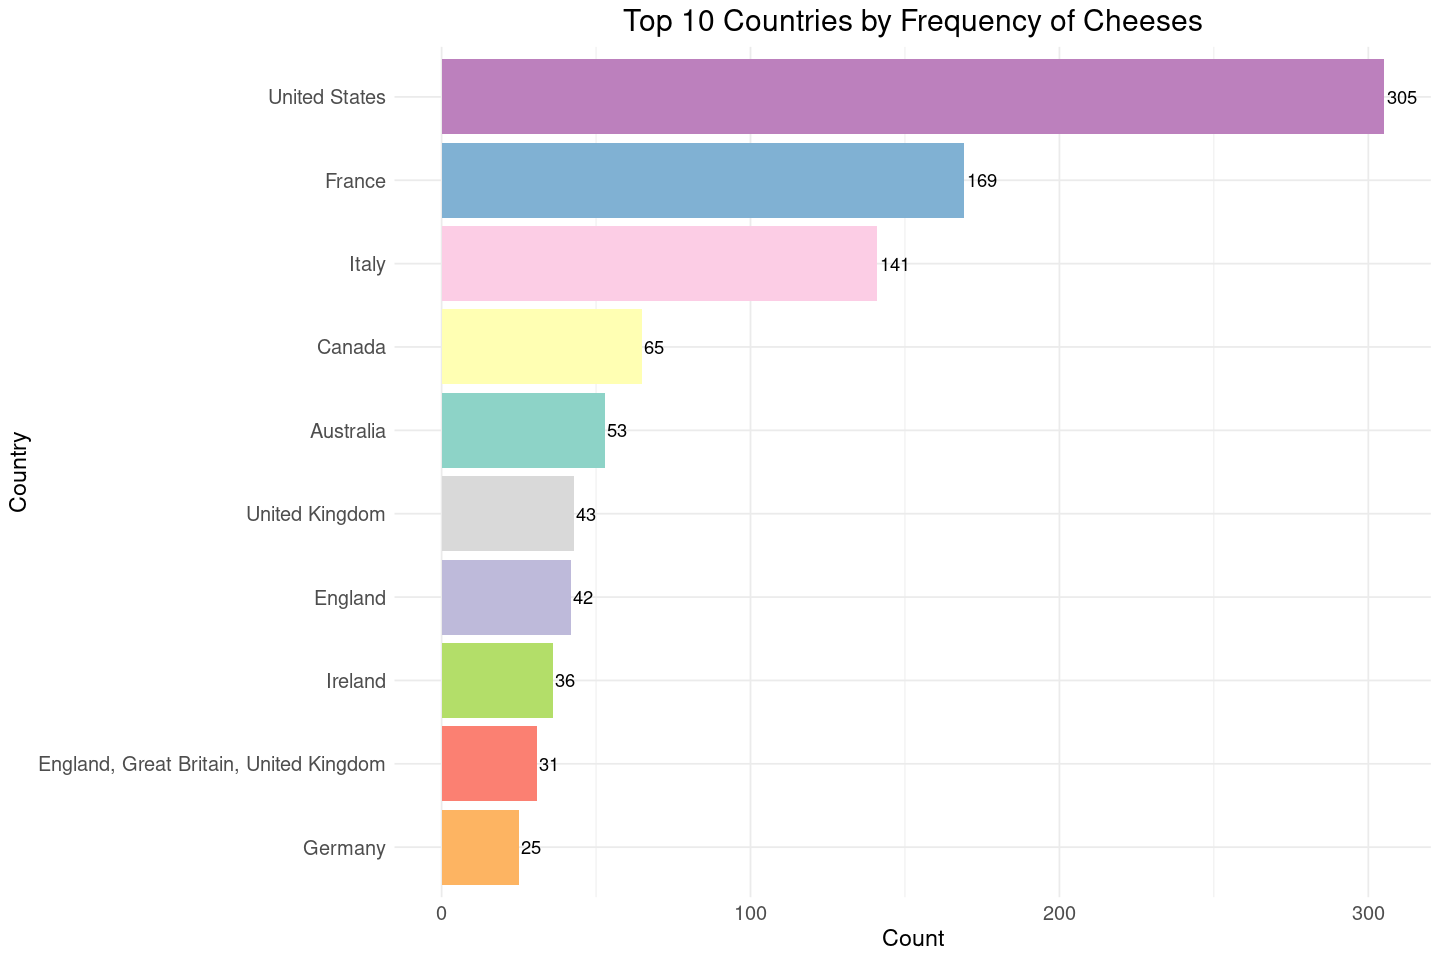

In [8]:
df_clean_Countries <- df %>%
  filter(!is.na(country) & country != "")

top_countries <- df_clean_Countries %>%
  count(country, sort = TRUE) %>%
  top_n(10, n)

options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(top_countries, aes(x = reorder(country, n), y = n, fill = country)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.1, color = "black") +
  scale_fill_brewer(palette = "Set3") +
  labs(
    title = "Top 10 Countries by Frequency of Cheeses",
    x = "Country",
    y = "Count"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, size = 18),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12)
  )


In [9]:
#Count of regions#

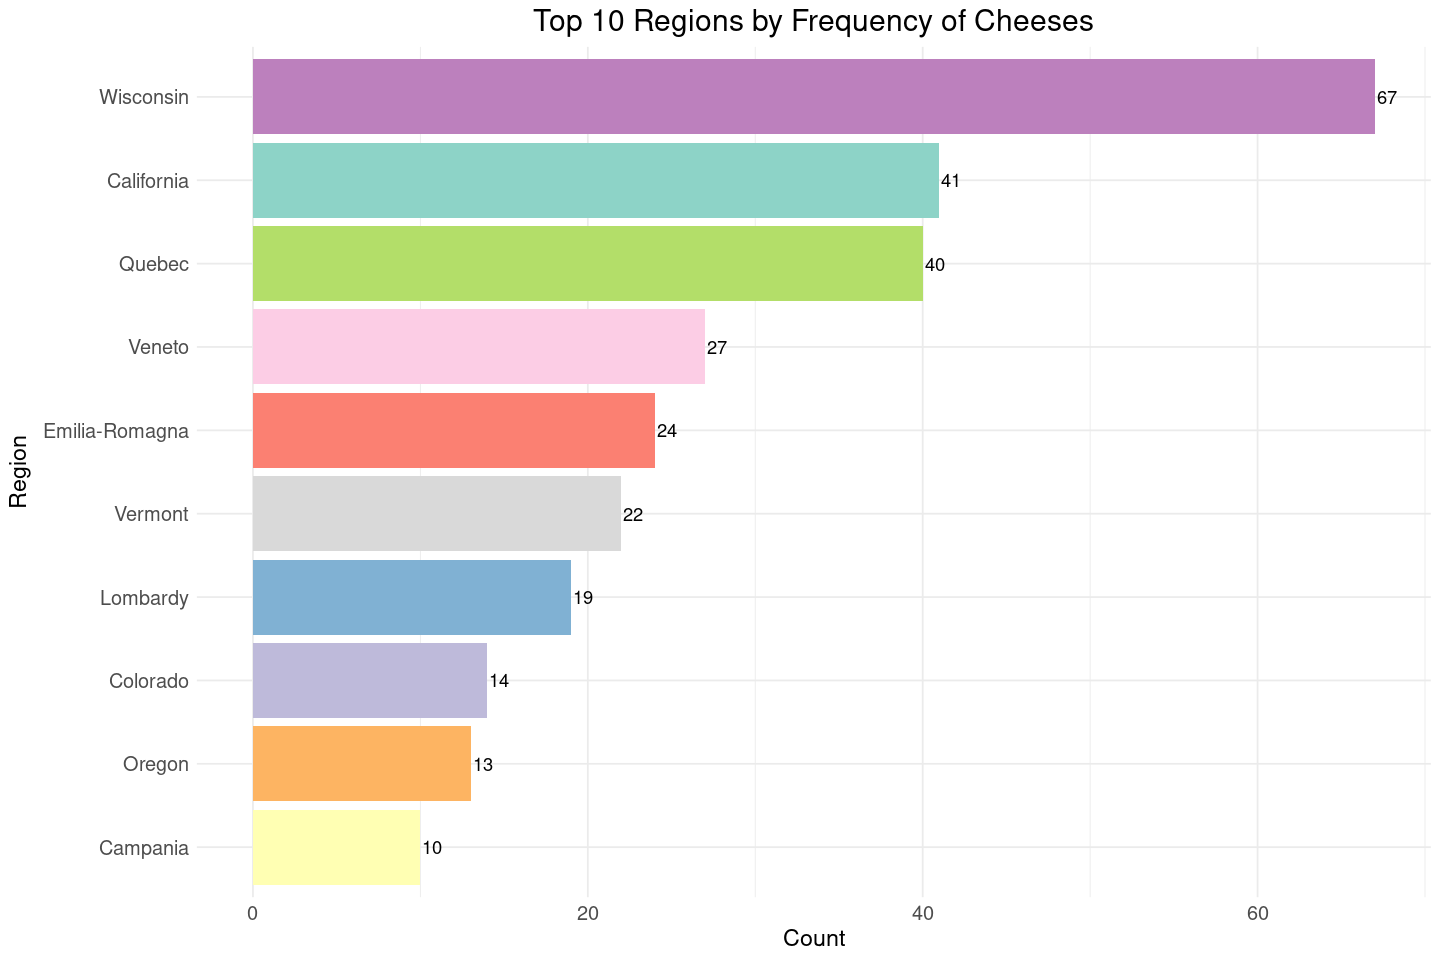

In [10]:
df_clean_region <- df %>%
  filter(!is.na(region) & region != "" & region != "NA" )

top_region <- df_clean_region %>%
  count(region, sort = TRUE) %>%
  top_n(10, n)

ggplot(top_region, aes(x = reorder(region, n), y = n, fill = region)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.1, color = "black") +
  scale_fill_brewer(palette = "Set3") +
  labs(
    title = "Top 10 Regions by Frequency of Cheeses",
    x = "Region",
    y = "Count"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, size = 18),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12)
  )


In [11]:
# Count of textures

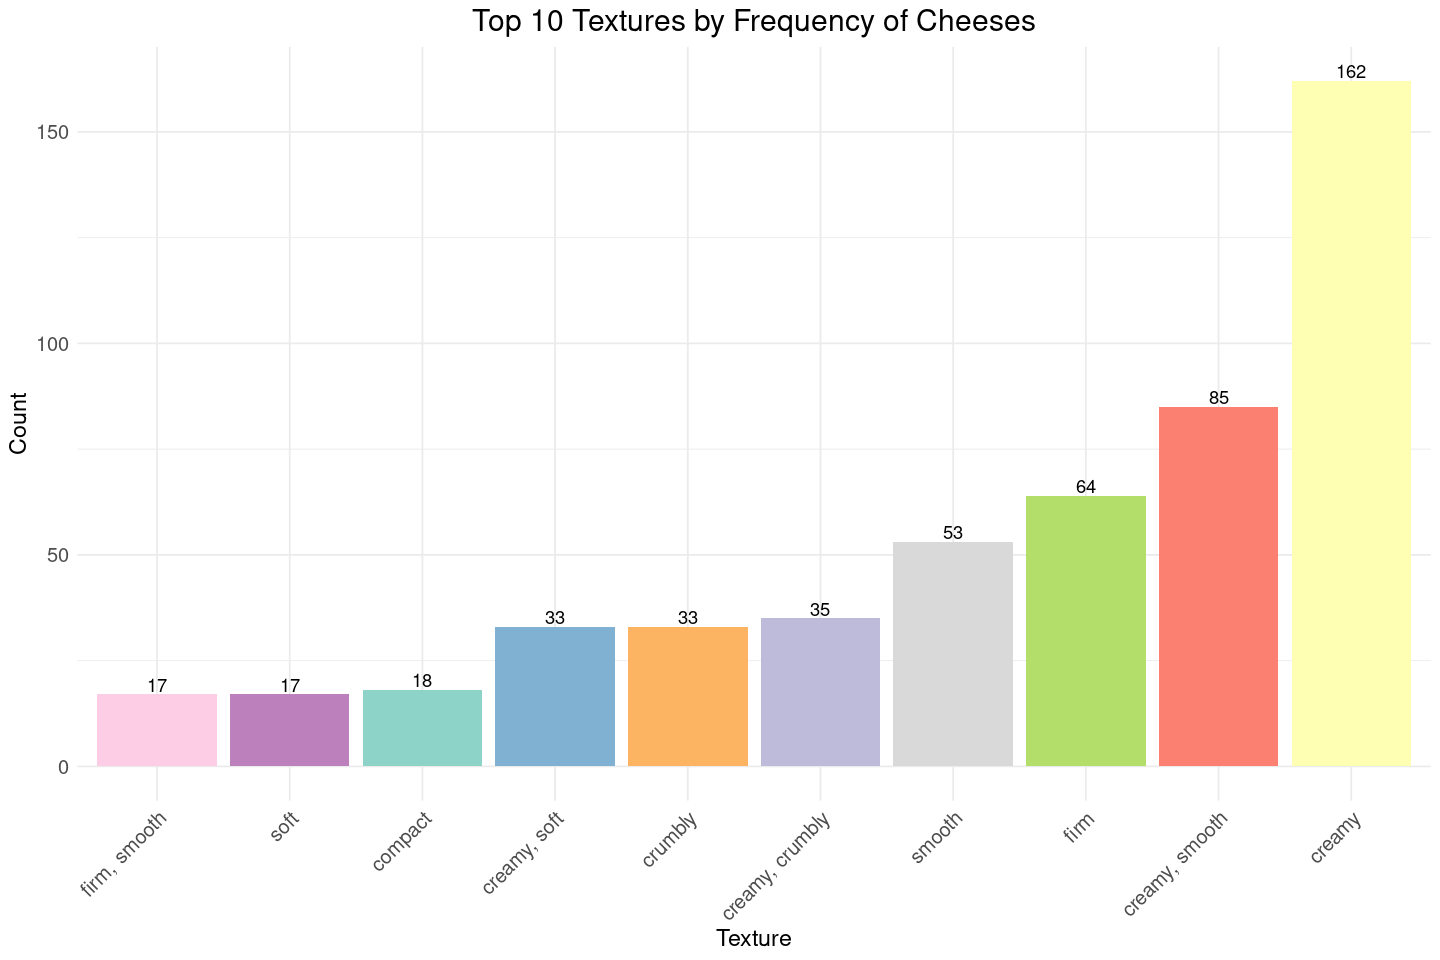

In [12]:
df_clean_texture <- df %>%
  filter(!is.na(texture) & texture != "")

top_texture <- df_clean_texture %>%
  count(texture, sort = TRUE) %>%
  top_n(10, n)

ggplot(top_texture, aes(x = reorder(texture, n), y = n, fill = texture)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = n), vjust = -0.2, color = "black") +
  scale_fill_brewer(palette = "Set3") +
  labs(
    title = "Top 10 Textures by Frequency of Cheeses",
    x = "Texture",
    y = "Count"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    legend.position = "none"
  )

In [13]:
# Count of families


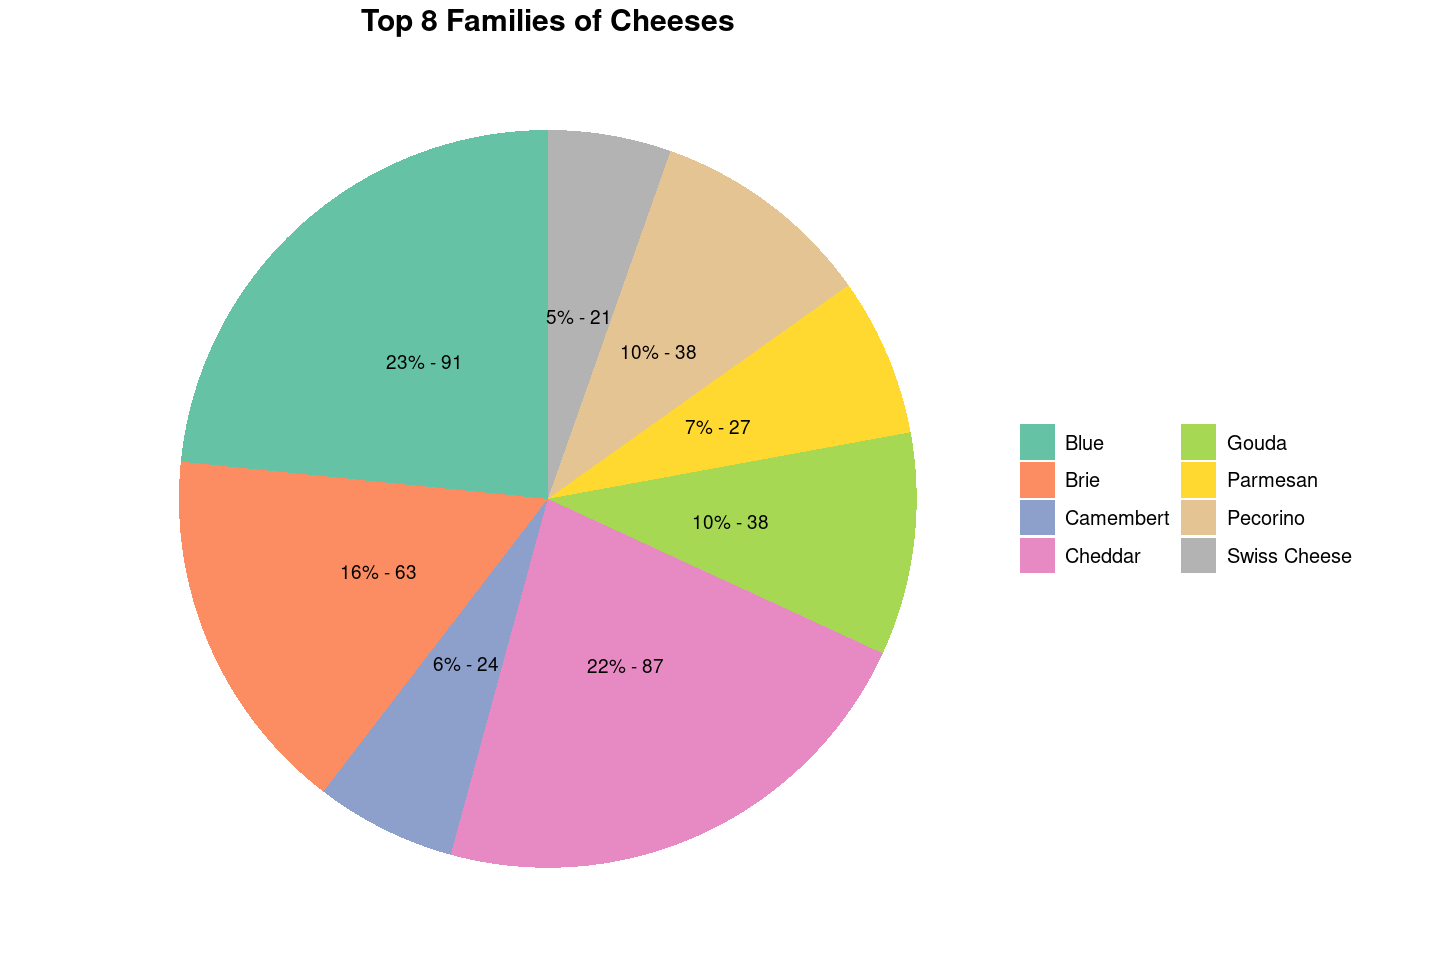

In [14]:
df_clean_family <- df %>%
  filter(!is.na(family) & texture != "" & family!= "NA")


family_counts <- df_clean_family %>%
  count(family, sort = TRUE) %>%
  top_n(8, n)  

family_counts <- family_counts %>%
  mutate(percentage = prop.table(n) * 100)


ggplot(family_counts, aes(x = "", y = n, fill = family)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = paste0(round(percentage), "% - ", n)), 
            position = position_stack(vjust = 0.5), 
            color = "black", size = 4) + 
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Top 8 Families of Cheeses"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    legend.position = "right",  # Mueve la leyenda al lado derecho
    legend.title = element_blank(),
    legend.text = element_text(size = 12),
    legend.spacing.y = unit(0.5, "cm"),  
    legend.key.size = unit(0.8, "cm")    
  ) +
  guides(fill = guide_legend(ncol = 2))  




In [15]:
# Count Flavor#


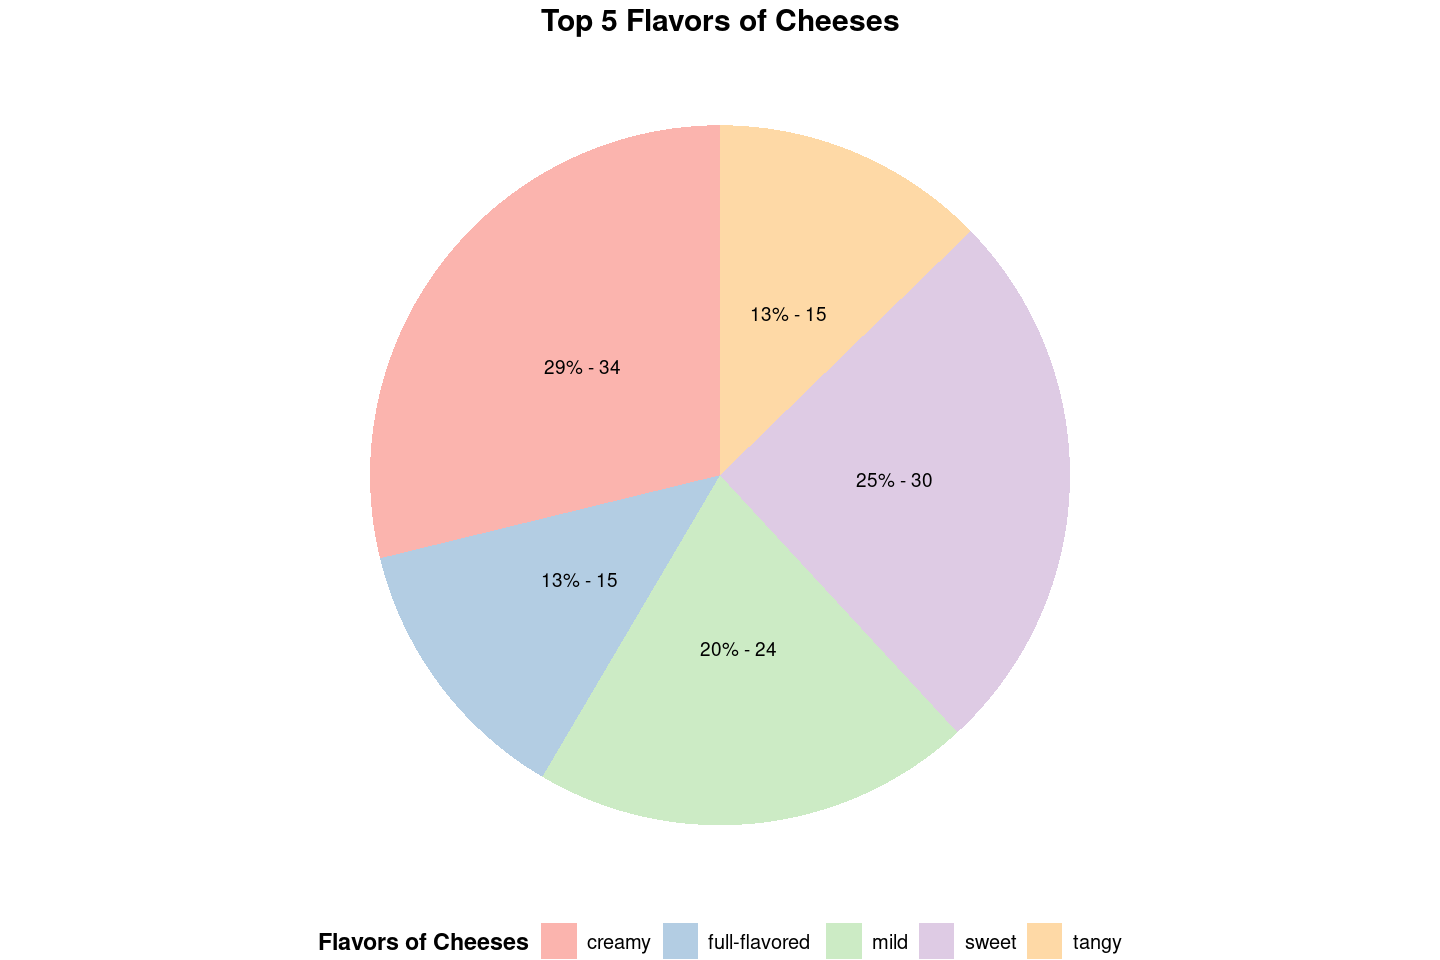

In [16]:
df_clean_flavor <- df %>%
  filter(!is.na(flavor) & flavor != "" & flavor != "NA")

flavor_counts <- df_clean_flavor %>%
  count(flavor, sort = TRUE) %>%
  top_n(5, n)  

flavor_counts <- flavor_counts %>%
  mutate(percentage = prop.table(n) * 100)

ggplot(flavor_counts, aes(x = "", y = n, fill = flavor)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = paste0(round(percentage), "% - ", n)), 
            position = position_stack(vjust = 0.5), 
            color = "black", size = 4) + 
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Pastel1", name = "Flavors of Cheeses") + 
  labs(title = "Top 5 Flavors of Cheeses") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    legend.position = "bottom",
    legend.title = element_text(size = 14, face = "bold"), 
    legend.text = element_text(size = 12),
    legend.key.size = unit(0.8, "cm"), 
    legend.spacing.x = unit(0.5, "cm")  
  )


In [17]:
# Count Color#



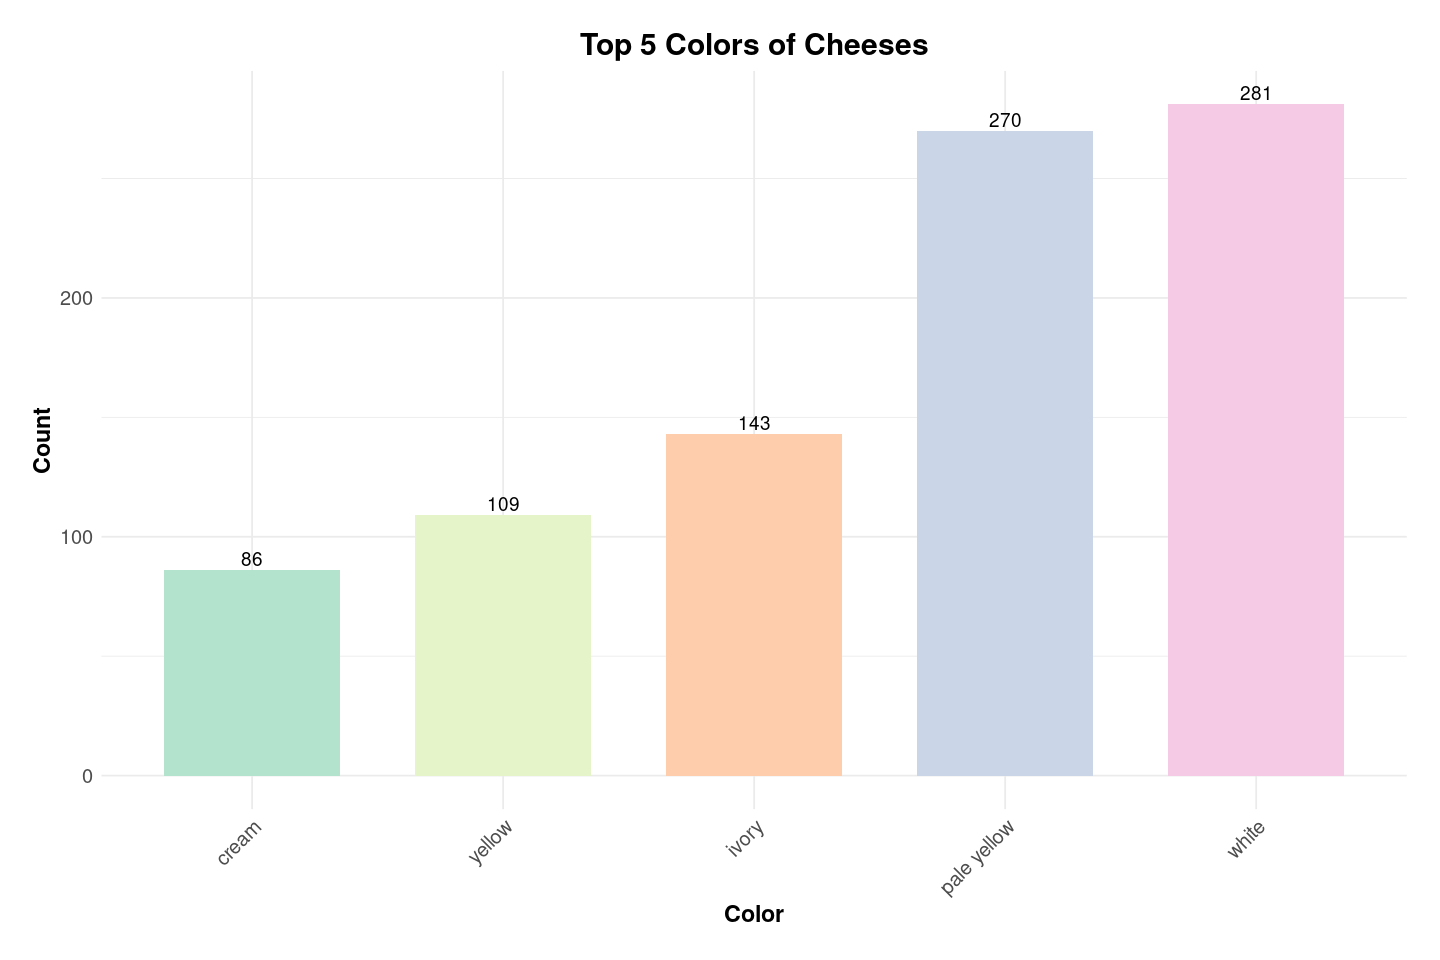

In [18]:
df_clean_color <- df %>%
  filter(!is.na(color) & color != "" & color != "NA")

color_counts <- df_clean_color %>%
  count(color, sort = TRUE) %>%
  top_n(5, n)  

ggplot(color_counts, aes(x = reorder(color, n), y = n, fill = color)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_text(aes(label = n), vjust = -0.3, color = "black", size = 4) +  
  scale_fill_brewer(palette = "Pastel2") +
  labs(title = "Top 5 Colors of Cheeses", x = "Color", y = "Count") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    legend.position = "none", 
    plot.margin = margin(20, 20, 20, 20)
  )


In [19]:
# Count milk#

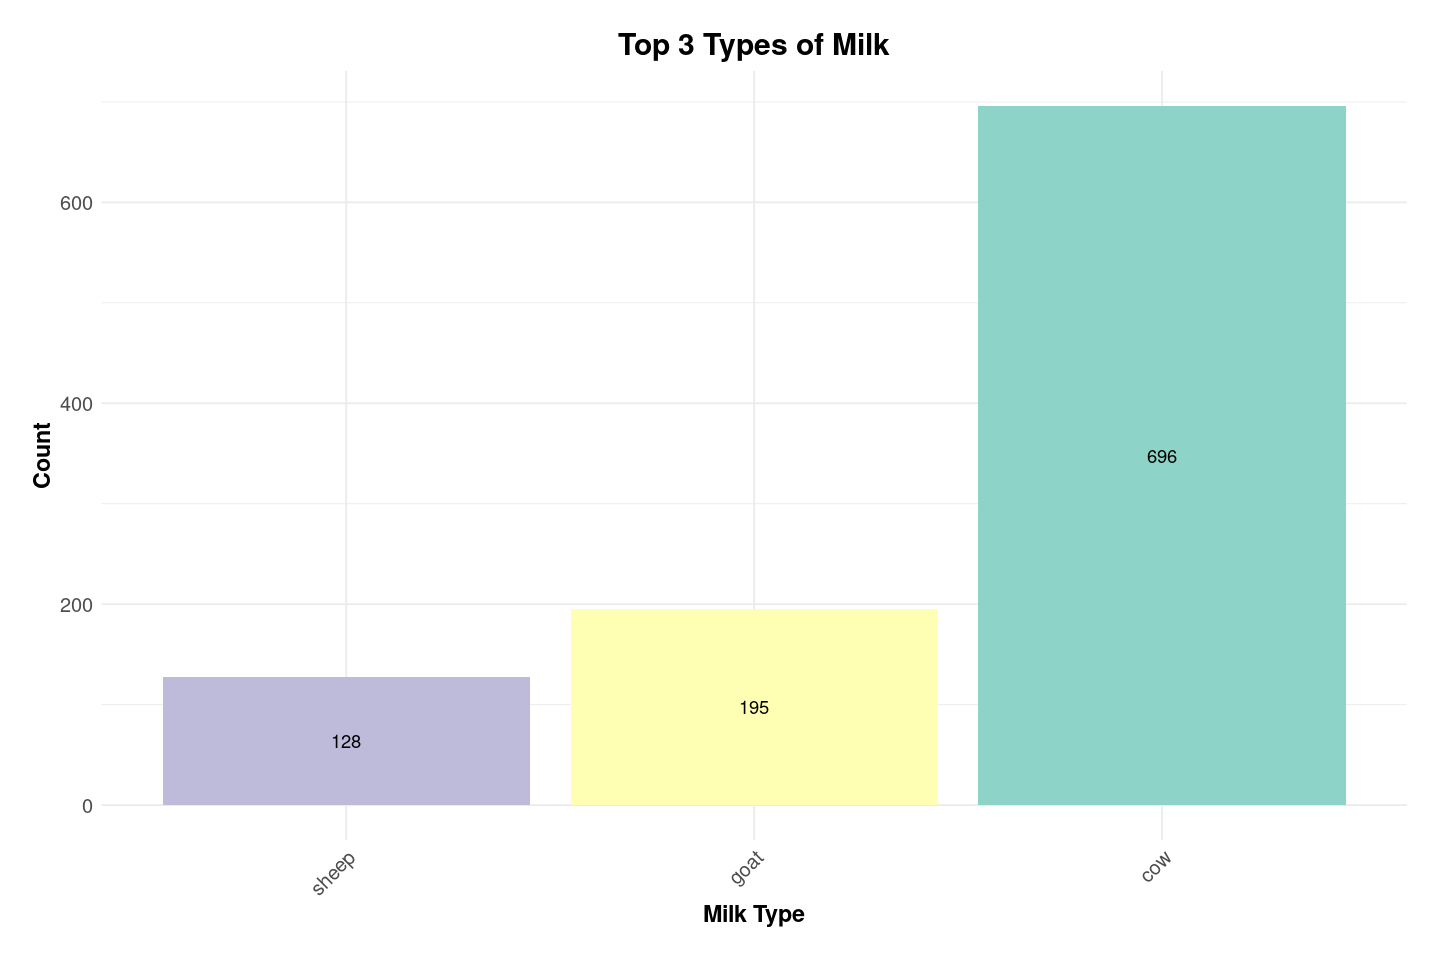

In [20]:

df_clean_milk <- df %>%
  filter(!is.na(milk) & milk != "")

milk_counts <- df_clean_milk %>%
  count(milk, sort = TRUE) %>%
  top_n(3, n)  

ggplot(milk_counts, aes(x = n, y = reorder(milk, n), fill = milk)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = n), position = position_stack(vjust = 0.5), color = "black") +
  scale_fill_brewer(palette = "Set3") +
  labs(title = "Top 3 Types of Milk", x = "Count", y = "Milk Type") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    legend.position = "none", 
    plot.margin = margin(20, 20, 20, 20)
  ) +
  coord_flip()

<div style="background-color:#FAFAFA; border:1px solid #CCC; padding:20px; border-radius:10px; font-family:Arial, sans-serif; color:#333;"> <h2 style="color:#4A90E2; text-align:center;">7. Generación de Nube de Palabras</h2> <p>Se creó una <strong>nube de palabras</strong> para mostrar los nombres de los quesos más comunes en la base de datos. Este tipo de visualización ayuda a identificar rápidamente los quesos que se repiten con más frecuencia.</p> <h3 style="color:#333;">a) Limpieza de Datos</h3> <p>Primero, se limpiaron los datos eliminando los valores vacíos o nulos en la columna de nombres de quesos:</p> <pre style="background-color:#F4F4F4; padding:10px; border-radius:5px; overflow:auto;"> <code> df_clean_cheese &lt;- df %&gt;% filter(!is.na(cheese) &amp; cheese != "" &amp; cheese != "NA") </code> </pre> <h3 style="color:#333;">b) Creación de la Nube de Palabras</h3> <p>Luego, se utilizó la función <code>wordcloud</code> para generar la visualización. Se configuraron algunos parámetros para definir el número máximo de palabras, el tamaño de las letras y los colores usados:</p> <pre style="background-color:#F4F4F4; padding:10px; border-radius:5px; overflow:auto;"> <code> wordcloud( words = df_clean_cheese$cheese, min.freq = 3, max.words = 100, colors = brewer.pal(9, "Set1"), scale = c(6, 1.5) ) </code> </pre> <p>El resultado muestra los quesos más mencionados en la base de datos, donde los nombres más grandes representan aquellos que aparecen con mayor frecuencia.</p> </div>

In [21]:
##WORDCLOUD##


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


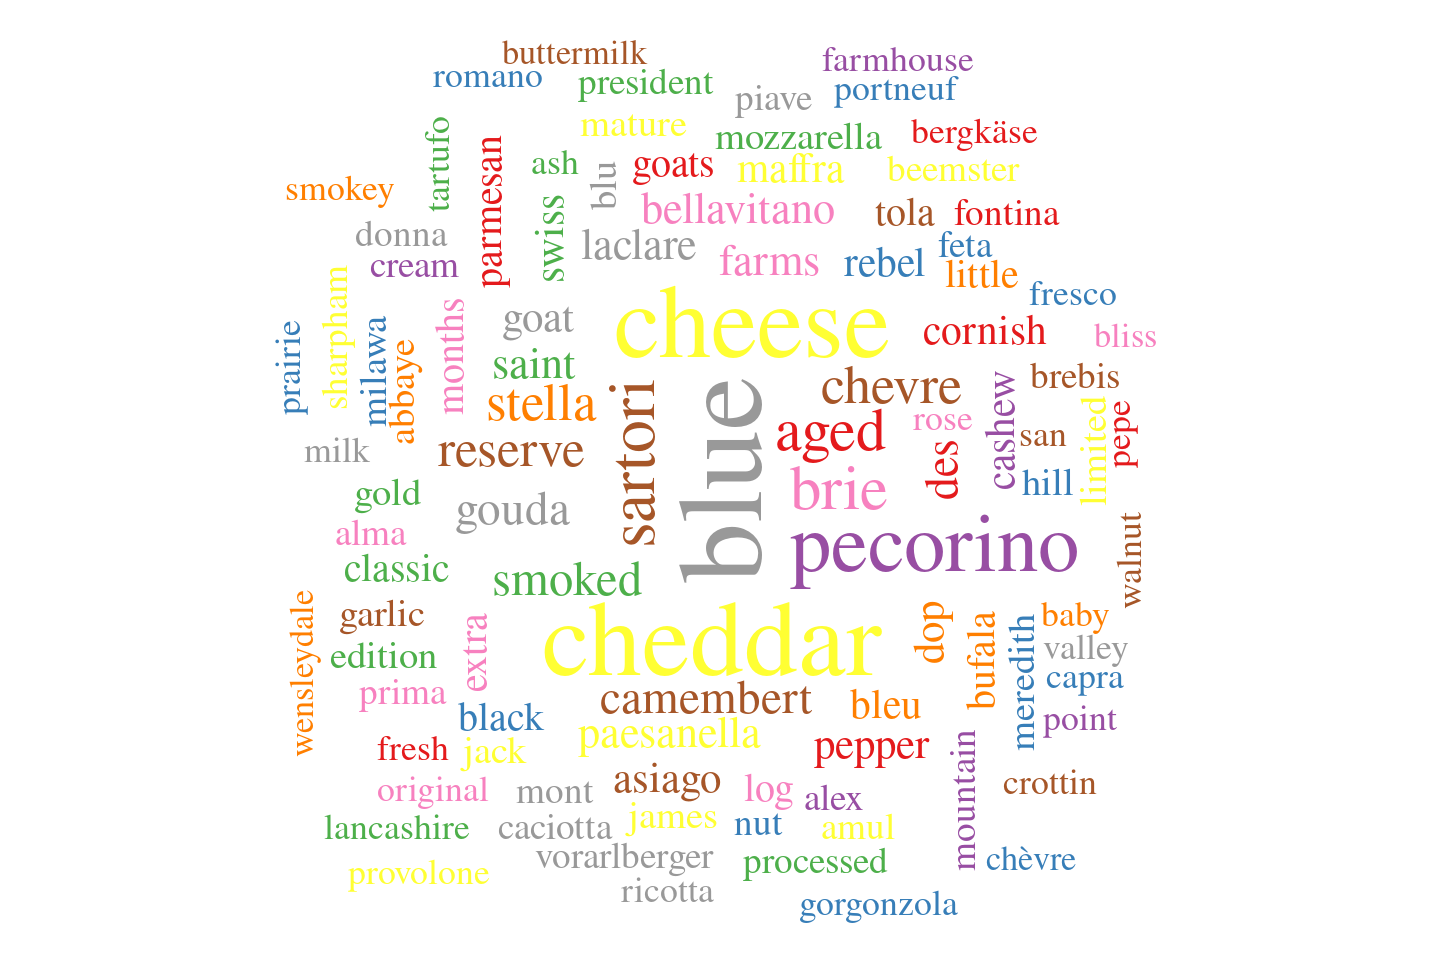

In [22]:

df_clean_cheese <- df %>%
  filter(!is.na(cheese) & cheese != "" & cheese != "NA")  

set.seed(123)

wordcloud(
  words = df_clean_cheese$cheese,
  min.freq = 3,
  max.words = 100,
  random.order = FALSE,
  rot.per = 0.25,
  colors = brewer.pal(9, "Set1"),
  scale = c(6, 1.5),
  family = "serif",
  random.color = TRUE,
  use.r.layout = FALSE
)  